# **Homework #2_P1**

## **Problem 1: Image classification**
### **Task Definition**

• In this assignment, you will need to perform image classification.
which predicts labels to each image with CNN models.      
• Input : RGB image     
• Output : classification label     

### **Baseline model**     
• You can use pre-trained vgg16 (or called feature extractor) as the backbone of your CNN model.*Please use ImageNet pre-trained backbone.     
• You’re also allowed to use other networks to fulfill the task.

### **Dataset**
• It consists of 25000 colour images with size 32x32 pixels of 50 classes.   
• We split the dataset into   
• train/   

*   22500 images 
*   images are named ‘x_y.png’ → x: class label; y:number
   
• Validation/     

*   2500 images 
*   Naming rules are the same as train/ 


• You CANNOT use validation data for training purposes.   

### **Grading - Problem 1: Image classification(30%)**

• Model Performance(20%)

*   Accuracy should be above the baseline score to get points

  *   On the validation set(15%): 0.7
  *   On the test set(5%): 0.7

• TAs will execute your code to check if you pass the baseline.   
• Only TAs have the test data

In [ ]:
# connect to drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = 'drive/My Drive/senior_1/DLCV/HW/hw2'

Mounted at /content/drive


In [ ]:
!gdown --id '1luNp4MCKzS85ay5rD5ke0HioGIQdkFJh' --output hw2_data.zip # 下載資料集
!unzip hw2_data.zip # 解壓縮

In [ ]:
!pip3 install certifi==2020.6.20
!pip3 install cycler==0.10.0
!pip3 install joblib==0.17.0
!pip3 install kiwisolver==1.2.0
!pip3 install matplotlib==3.3.2
!pip3 install numpy==1.18.1
!pip3 install pandas==1.1.3
!pip3 install Pillow==8.0.0
!pip3 install pyparsing==2.4.7
!pip3 install python-dateutil==2.8.1
!pip3 install pytz==2020.1
!pip3 install scikit-learn==0.21.3
!pip3 install scipy==1.2.1
!pip3 install six==1.15.0
!pip3 install torch==1.4.0
!pip3 install torchvision==0.5.0

     |████████████████████████████████| 92kB 4.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: kiwisolver 1.3.1
    Uninstalling kiwisolver-1.3.1:
ERROR: Operation cancelled by user
     |████████████████████████████████| 11.6MB 213kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 20.2MB 7.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


     |████████████████████████████████| 9.5MB 6.4MB/s 
  Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


     |████████████████████████████████| 2.2MB 6.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


     |████████████████████████████████| 512kB 7.2MB/s 
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


     |████████████████████████████████| 6.7MB 5.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 24.8MB 138kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 753.4MB 23kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled to

In [ ]:
# Import 需要的套件
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import time
import random
import scipy.misc
import argparse
import imageio
import matplotlib.pyplot as plt
from sklearn import manifold

# 固定隨機種子
def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

same_seeds(0)

In [ ]:
torchvision.__version__

'0.5.0'

#Read image

In [ ]:
def sortfile(path):
    index = []
    image_dir = sorted(os.listdir(path)) # 把圖檔按照編號排列
    for i, file in enumerate(image_dir):
        if 'png' in file:
            index.append([file, int(file.replace('_', '').replace('.png', ''))])

    index = sorted(index, key = lambda s: s[1])

    return index

# 要重新整理一下
def readfile(path, index, label):
    x = np.zeros((len(index), 32, 32, 3), dtype=np.uint8)
    y = np.zeros((len(index)), dtype=np.uint8)
    for i, file in enumerate(index):
        img = imageio.imread(os.path.join(path, file[0]))
        x[i, :, :] = img
        if label:
          y[i] = int(file[0].split("_")[0])
    if label:
        return x, y
    else:
        return x

In [ ]:
# 分別將 training set、validation set、testing set 用 sortfile, readfile 函式讀進來
workspace_dir = './hw2_data'
print("Reading data")

train_index = sortfile(os.path.join(workspace_dir, "p1_data/train_50"))
val_index = sortfile(os.path.join(workspace_dir, "p1_data/val_50"))

train_x, train_y = readfile(os.path.join(workspace_dir, "p1_data/train_50"), train_index, True)
print("Size of training data = {}".format(len(train_x)))

val_x, val_y = readfile(os.path.join(workspace_dir, "p1_data/val_50"), val_index, True)
print("Size of validation data = {}".format(len(val_x)))

Reading data
Size of training data = 22500
Size of validation data = 2500


# Dataset
在 PyTorch 中，我們可以利用 torch.utils.data 的 Dataset 及 DataLoader 來"包裝" data，使後續的 training 及 testing 更為方便。

Dataset 需要 overload 兩個函數：\_\_len\_\_ 及 \_\_getitem\_\_

\_\_len\_\_ 必須要回傳 dataset 的大小，而 \_\_getitem\_\_ 則定義了當程式利用 [ ] 取值時，dataset 應該要怎麼回傳資料。

實際上我們並不會直接使用到這兩個函數，但是使用 DataLoader 在 enumerate Dataset 時會使用到，沒有實做的話會在程式運行階段出現 error。


In [ ]:
# training 時做 Data augmentation
# 一張圖片經過旋轉、調整大小、比例尺寸，或者改變亮度色溫、翻轉等處理後，我們人眼仍能辨識出來是相同的相片，但是對機器來說那可是完全不同的新圖像了，
# 因此， Data augmentation 就是將 dataset中既有的圖片予以修改變形，以創造出更多的圖片來讓機器學習，彌補資料量不足的困擾。

train_transform = transforms.Compose([
    transforms.ToPILImage(), # 轉成 python 圖片
    transforms.RandomHorizontalFlip(), # 隨機將圖片水平翻轉
    transforms.RandomRotation(15), # 隨機旋轉圖片，表示在（-15，+15）之間隨機旋轉
    transforms.ToTensor(), # 將圖片轉成 Tensor，並把數值 normalize 到 [0,1] (data normalization) ps. Tensor 為多維張量
    transforms.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)) 
])

# testing 時不需做 data augmentation
test_transform = transforms.Compose([
    transforms.ToPILImage(),                                    
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)) 
])

class ImgDataset(Dataset):
    def __init__(self, x, y=None, transform=None): # transform 自己決定
        self.x = x
        # label is required to be a LongTensor
        self.y = y
        if y is not None:
            self.y = torch.LongTensor(y)
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        X = self.x[index]
        if self.transform is not None:
            X = self.transform(X)
        if self.y is not None:
            Y = self.y[index]
            return X, Y
        else:
            return X

In [ ]:
batch_size = 128
train_set = ImgDataset(train_x, train_y, train_transform)
val_set = ImgDataset(val_x, val_y, test_transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

# Model

### vgg19_own_define

In [ ]:
# best_model
class vgg19_Classifier(nn.Module):
    def __init__(self):
        super(vgg19_Classifier, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input 維度 [3, 32, 32]
        self.features = nn.Sequential(
        # class torch.nn.Sequential(*args)
        # 多個模塊按照它們傳入構造函數的順序被加入到神經網路中

            # 讀者可以自行更改網路架構
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # [64, 32, 32] ps.padding 後從 32 => 34，再從 34-3+1 = 32
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # [64, 32, 32] ps.padding 後從 32 => 34，再從 34-3+1 = 32
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), # [64, 16, 16] 32/2 = 16

            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # [256, 8, 8] ps.padding 後從 8 => 10，再從 10-3+1 = 8
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),

            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),

            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        )

        self.avgPool = nn.Sequential(
            nn.AdaptiveAvgPool2d(output_size=(7, 7)),
        )

        self.classifier = nn.Sequential(
            # flatten
            nn.Linear(in_features=25088, out_features=4096, bias=True),

            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),

            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=1000, bias=True),
        )

    def forward(self, x):
        out_1 = self.features(x)
        out_1 = self.avgPool(out_1)
        out_1 = out_1.view(out_1.size()[0], -1)
        out_1 = self.classifier(out_1)
        # out_2 = self.fc_2(out_1)
        return out_1

### pretrained_vgg

In [ ]:
from torchsummary import summary

model = models.vgg19_bn(pretrained=True).cuda()
summary(model, input_size=(3, 32, 32))

# Training

使用 training set 訓練，並使用 validation set 尋找好的參數

In [ ]:
model = models.vgg19_bn(pretrained=True).cuda()
loss = nn.CrossEntropyLoss() # 因為是 classification task，所以 loss 使用 CrossEntropyLoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # optimizer 使用 Adam
num_epoch = 250
best_val_acc = 0

for epoch in range(num_epoch):
    epoch_start_time = time.time()
    train_acc = 0.0
    train_loss = 0.0
    val_acc = 0.0
    val_loss = 0.0

    model.train() # 確保 model 是在 train model (開啟 Dropout 等...)
    for i, data in enumerate(train_loader):
        optimizer.zero_grad() # 用 optimizer 將 model 參數的 gradient 歸零
        train_pred = model(data[0].cuda()) # 利用 model 得到預測的機率分佈 這邊實際上就是去呼叫 model 的 forward 函數
        batch_loss = loss(train_pred, data[1].cuda()) # 計算 loss （注意 prediction 跟 label 必須同時在 CPU 或是 GPU 上）
        batch_loss.backward() # 利用 back propagation 算出每個參數的 gradient
        optimizer.step() # 以 optimizer 用 gradient 更新參數值

        train_acc += np.sum(np.argmax(train_pred.cpu().data.numpy(), axis=1) == data[1].numpy())
        train_loss += batch_loss.item()
    
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            val_pred = model(data[0].cuda())
            batch_loss = loss(val_pred, data[1].cuda())

            val_acc += np.sum(np.argmax(val_pred.cpu().data.numpy(), axis=1) == data[1].numpy())
            val_loss += batch_loss.item()

        if(val_acc > best_val_acc):
            best_val_acc = val_acc
            torch.save(model.state_dict(), path + '/new_model_best_p1.pkl')
            print('save model')

        #將結果 print 出來
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
            (epoch + 1, num_epoch, time.time()-epoch_start_time, \
             train_acc/train_set.__len__(), train_loss/train_set.__len__(), val_acc/val_set.__len__(), val_loss/val_set.__len__()))
      
print('best_val_acc =', best_val_acc/val_set.__len__())   

#test

In [ ]:
model = models.vgg19_bn(pretrained=True).cuda()
model.load_state_dict(torch.load(path + '/new_model_best_p1.pkl'))
model.eval()
prediction = []

with torch.no_grad():
    loss = nn.CrossEntropyLoss() # 因為是 classification task，所以 loss 使用 CrossEntropyLoss
    val_acc = 0.0
    val_loss = 0.0

    for i, data in enumerate(val_loader):
        val_pred = model(data[0].cuda())
        batch_loss = loss(val_pred, data[1].cuda())

        val_acc += np.sum(np.argmax(val_pred.cpu().data.numpy(), axis=1) == data[1].numpy())
        prediction_label = np.argmax(val_pred.cpu().data.numpy(), axis=1)

        for y in prediction_label:
            prediction.append(y)

        val_loss += batch_loss.item()

    #將結果 print 出來
    print('best_val_acc =', val_acc/val_set.__len__())  

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth



best_val_acc = 0.7224


In [ ]:
# 將結果寫入 csv 檔
from google.colab import files
with open("test_pred.csv", 'w') as f:
    f.write('image_id,label\n')
    for i, y in  enumerate(prediction):
        f.write('{},{}\n'.format(val_index[i][0], y))
        
# 存到本機端
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Report

1. (2%)Print the network architecture of your model.

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

2. (2%)Report accuracy of model on the validation set.

In [ ]:
model = models.vgg19_bn(pretrained=True).cuda()
model.load_state_dict(torch.load(path + '/new_model_best_p1.pkl'))
model.eval()
prediction = []

with torch.no_grad():
    loss = nn.CrossEntropyLoss() # 因為是 classification task，所以 loss 使用 CrossEntropyLoss
    val_acc = 0.0
    val_loss = 0.0

    for i, data in enumerate(val_loader):
        val_pred = model(data[0].cuda())
        batch_loss = loss(val_pred, data[1].cuda())

        val_acc += np.sum(np.argmax(val_pred.cpu().data.numpy(), axis=1) == data[1].numpy())
        prediction_label = np.argmax(val_pred.cpu().data.numpy(), axis=1)

        for y in prediction_label:
            prediction.append(y)

        val_loss += batch_loss.item()

    #將結果 print 出來
    print('best_val_acc =', val_acc/val_set.__len__())   

best_val_acc = 0.7188


In [ ]:
# 將結果寫入 csv 檔
from google.colab import files
with open("test_pred.csv", 'w') as f:
    f.write('image_id,label\n')
    for i, y in  enumerate(prediction):
        f.write('{},{}\n'.format(val_index[i][0], y))
        
# 存到本機端
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. (6%)Visualize the classification result on validation set by implementing t-SNE on output
features of the second last layer. Briefly explain your result of tSNE visualization.    
*You can use scikit-learn to fulfill t-SNE.

In [ ]:
# 取出倒數 2nd layer
class vgg19_last_2nd(nn.Module):
    def __init__(self, original_model):
        super(vgg19_last_2nd, self).__init__()
        self.features = nn.Sequential(
            *list(original_model.features.children())[:],
        )

        self.avgpool = (
            original_model.avgpool
        )

        self.classifier = nn.Sequential(
            *list(original_model.classifier.children())[:-3]
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size()[0], -1)
        x = self.classifier(x)

        return x

model = models.vgg19_bn(pretrained=True).cuda()
model.load_state_dict(torch.load(path + '/new_model_best_p1.pkl'))
vgg19_bottom = vgg19_last_2nd(model)
last_2nd_features = torch.tensor([]).cuda()

vgg19_bottom.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader):
        val_pred = vgg19_bottom(data[0].cuda())
        last_2nd_features = torch.cat((last_2nd_features, val_pred), 0)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.604s...
[t-SNE] Computed neighbors for 2500 samples in 34.763s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.612900
[t-SNE] KL divergence after 1000 iterations: 0.579356


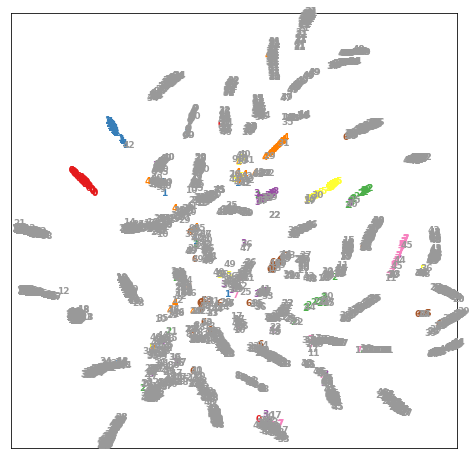

In [ ]:
#Prepare the data
X, y = last_2nd_features.detach().cpu().clone().numpy(), val_y
n_samples, n_features = X.shape

#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne-x_min) / (x_max-x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()